In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

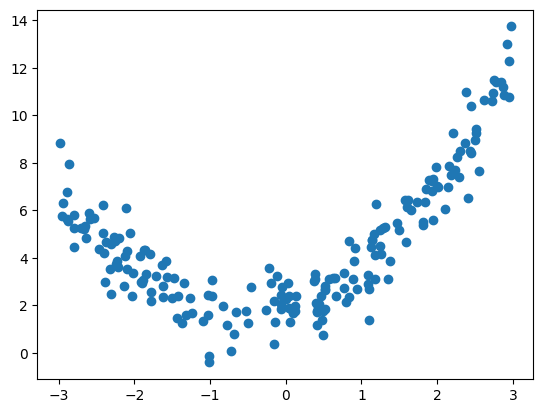

In [3]:
plt.scatter(X, y)

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=24)

In [5]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()

In [6]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
y_pred = lr.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_pred)
#r2_score(y_test, y_pred) 

6.027347346248506

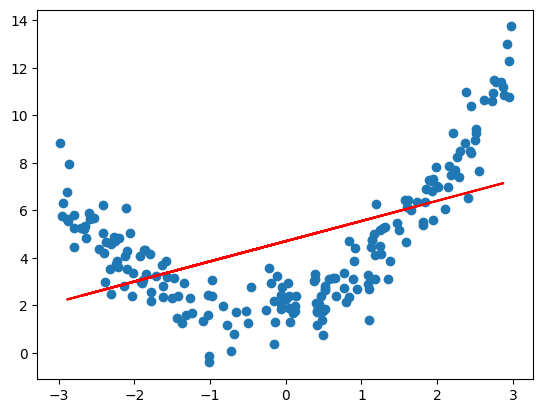

In [9]:
plt.scatter(X, y)
plt.plot(X_test,y_pred, color='red')

In [10]:
pl = PolynomialFeatures(degree=4)

In [11]:
X_train_trans = pl.fit_transform(X_train)
X_test_trans = pl.fit_transform(X_test)

In [12]:
lr.fit(X_train_trans,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_pred1 = lr.predict(X_test_trans)

In [14]:
r2_score(y_test, y_pred1)
#mean_squared_error(y_test,y_pred1)

0.8510262517008087

In [15]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = pl.transform(X_new)
y_new = lr.predict(X_new_poly)

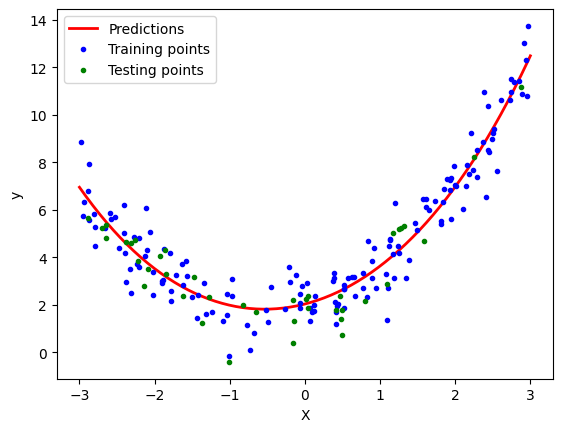

In [16]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

In [18]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = pl.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

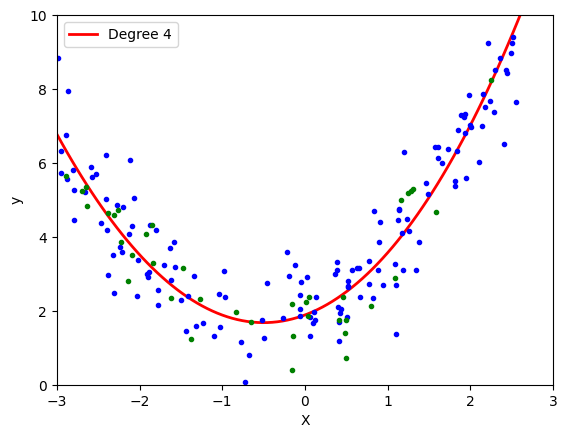

In [19]:

polynomial_regression(4)